<a href="https://colab.research.google.com/github/nermeen426/my-problem-solving-solution-on-codeforces.com/blob/main/Copy_of_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid-19**

**Reading dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/data/country_wise_latest.csv"
df = pd.read_csv(path)
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
df["WHO Region"].nunique()

6

In [ ]:
df.sort_values(by="Deaths", ascending=False).head(10)

In [ ]:
df.sort_values(by="Confirmed", ascending=False).head(10)

In [ ]:
df.sort_values(by="Recovered", ascending=False).head(10)

In [ ]:
df.sort_values(by="New cases", ascending=False).head(10)

In [ ]:
df.sort_values(["WHO Region", "Confirmed"], ascending=False)

In [ ]:
df.sort_values(["WHO Region", "Deaths"], ascending=False)

In [ ]:
df.sort_values(["WHO Region", "Recovered"], ascending=False)

In [ ]:
df.sort_values(["WHO Region", "Active"], ascending=False)

In [ ]:
df.groupby("WHO Region").count()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
WHO Region,,,,,,,,,,,,,,
Africa,48,48,48,48,48,48,48,48,48,48,48,48,48,48
Americas,35,35,35,35,35,35,35,35,35,35,35,35,35,35
Eastern Mediterranean,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Europe,56,56,56,56,56,56,56,56,56,56,56,56,56,56
South-East Asia,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Western Pacific,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [ ]:
df["Deaths"].agg(['min', 'mean', 'sum'])

min          0.000000
mean      3497.518717
sum     654036.000000
Name: Deaths, dtype: float64

In [ ]:
df["Recovered"].agg(['min', 'mean', 'sum'])

min     0.000000e+00
mean    5.063148e+04
sum     9.468087e+06
Name: Recovered, dtype: float64

In [ ]:
df["Confirmed"].agg(['min', 'mean', 'sum'])

min     1.000000e+01
mean    8.813094e+04
sum     1.648048e+07
Name: Confirmed, dtype: float64

In [ ]:
df["Active"].agg(['min', 'mean', 'sum'])

min     0.000000e+00
mean    3.400194e+04
sum     6.358362e+06
Name: Active, dtype: float64

**Visualising**

**China information**

<BarContainer object of 4 artists>

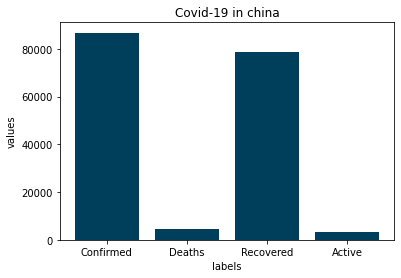

In [ ]:
china_info1= [86783, 4656, 78869, 3258]
labels = ["Confirmed", "Deaths", "Recovered", "Active"]
plt.xticks(range(len(china_info1)), labels)
plt.xlabel('labels')
plt.ylabel('values')
plt.title('Covid-19 in china')
plt.bar(range(len(china_info1)), china_info1, color="#003f5c")

<BarContainer object of 3 artists>

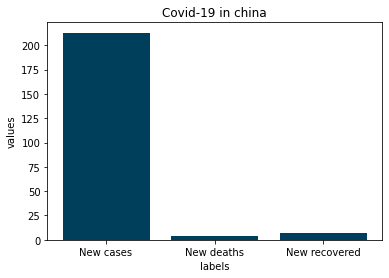

In [ ]:
china_info2= [213, 4, 7]
labels = ["New cases", "New deaths", "New recovered"]
plt.xticks(range(len(china_info2)), labels)
plt.xlabel('labels')
plt.ylabel('values')
plt.title('Covid-19 in china')
plt.bar(range(len(china_info2)), china_info2, color="#003f5c")

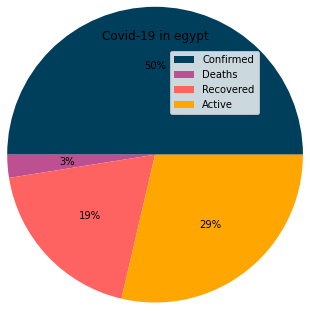

In [ ]:
egypt_info1= [92482, 4652, 34838, 52992]
plt.pie(egypt_info1,  radius=1.7, colors=["#003f5c","#bc5090", "#ff6361", "#ffa600"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Covid-19 in egypt')
plt.legend(labels=["Confirmed", "Deaths", "Recovered", "Active"])

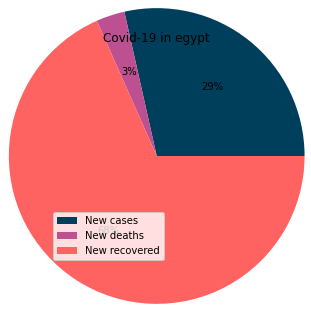

In [ ]:
egypt_info2= [420, 46, 1007]
plt.pie(egypt_info2, radius=1.7, colors=["#003f5c","#bc5090", "#ff6361"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Covid-19 in egypt')
plt.legend(labels=["New cases", "New deaths", "New recovered"])

**US information**

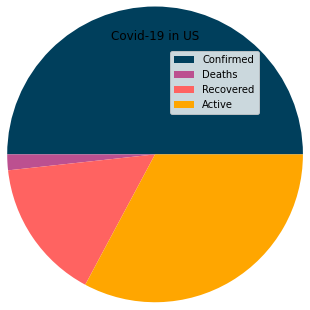

In [ ]:
us_info= [4290259, 148011, 1325804, 2816444]
plt.pie(us_info, radius=1.7, startangle=0, colors=["#003f5c","#bc5090", "#ff6361", "#ffa600"])
plt.title('Covid-19 in US')
plt.legend(labels=["Confirmed", "Deaths", "Recovered", "Active"])

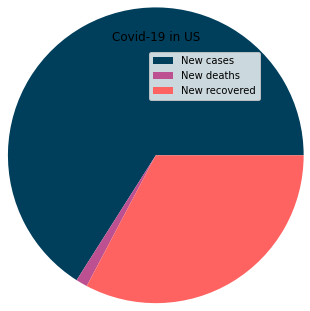

In [ ]:
us_info2= [56336, 1076, 27941]
plt.pie(us_info2,  radius=1.7, startangle=0, colors=["#003f5c","#bc5090", "#ff6361"])
plt.title('Covid-19 in US')
plt.legend(labels=["New cases", "New deaths", "New recovered"])

**US VS Egypt**

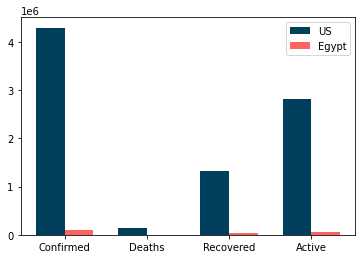

In [ ]:
us_info1 =[4290259, 148011, 1325804, 2816444]
egypt_info1= [92482, 4652, 34838, 52992]
names1 = ["Confirmed", "Deaths", "Recovered", "Active"]
X = np.arange(4)
width = 0.35
plt.bar(X, us_info1, width, label='US', color="#003f5c")
plt.bar(X + width, egypt_info1, width,label='Egypt', color="#ff6361")
plt.xticks(X + width / 2, ("Confirmed", "Deaths", "Recovered", "Active"))
plt.legend(loc='best')

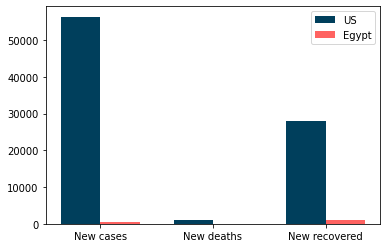

In [ ]:
X = np.arange(3)
width = 0.35
us_info2=[56336, 1076, 27941]
egypt_info2 = [420, 46, 1007]
names2= ["New cases", "New deaths", "New recovered"]
plt.bar(X, us_info2, width, label='US', color="#003f5c")
plt.bar(X + width, egypt_info2, width,label='Egypt', color="#ff6361")
plt.xticks(X + width / 2, ("New cases", "New deaths", "New recovered"))
plt.legend(loc='best')

Text(0.5, 1.0, '1 week change US vs Egypt')

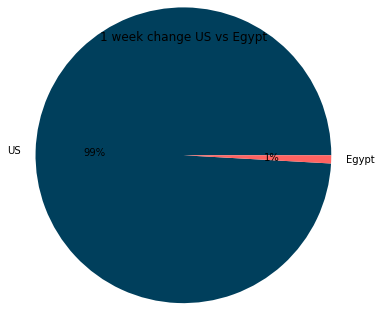

In [ ]:
week_change = [455582, 4080]
names = ["US", "Egypt"]
plt.pie(week_change, labels=names, labeldistance=1.1, radius=1.7,
        startangle=0, colors=["#003f5c","#ff6361"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('1 week change US vs Egypt')

**China VS Pakistan**

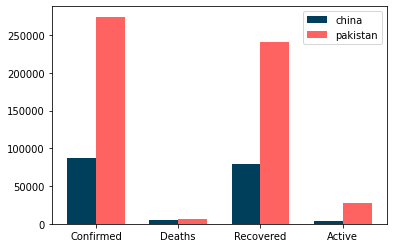

In [ ]:
china_info1 = (86783, 4656, 78869, 3258)
pakistan_info1 = (274289, 5842, 241026, 27421)
X = np.arange(4) 
width = 0.35 
plt.bar(X, china_info1, width, label='china', color="#003f5c")
plt.bar(X + width, pakistan_info1, width, label='pakistan', color="#ff6361")
plt.xticks(X + width / 2, ("Confirmed", "Deaths", "Recovered", "Active"))
plt.legend(loc='best')

-1 week change china vs pakistan

([<matplotlib.patches.Wedge at 0x7fc84b1d7ad0>,
 [Text(1.729630935485641, 0.7108282682976718, 'china'),
  Text(-1.7296309521237772, -0.7108282278127371, 'pakistan')],
 [Text(0.9434350557194404, 0.38772450998054825, '12%'),
  Text(-0.9434350647947874, -0.38772448789785663, '88%')])

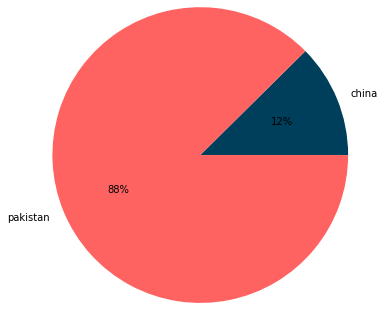

In [ ]:
week_change = [1161, 8193]
names = ["china", "pakistan"]
plt.pie(week_change, labels=names, labeldistance=1.1, radius=1.7,
        startangle=0, colors=["#003f5c","#ff6361"], 
        rotatelabels=False, autopct= "%1.0f%%")

**World information**

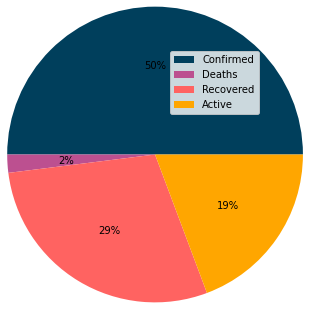

In [ ]:
world_mean1 =[df["Confirmed"].mean(), df["Deaths"].mean(), df["Recovered"].mean(), df["Active"].mean()]
plt.pie(world_mean1, radius=1.7,startangle=0, colors=["#003f5c","#bc5090", "#ff6361", "#ffa600"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.legend(labels=["Confirmed", "Deaths", "Recovered", "Active"])

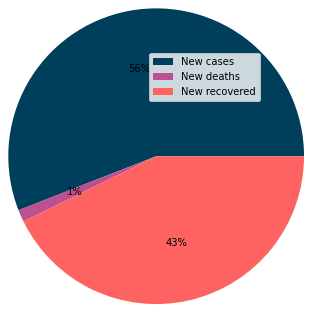

In [ ]:
world_mean2 = [df["New cases"].mean(), df["New deaths"].mean(), df["New recovered"].mean()]
plt.pie(world_mean2, radius=1.7,startangle=0, colors=["#003f5c","#bc5090", "#ff6361", "#ffa600"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.legend(labels=["New cases", "New deaths", "New recovered"])

**Regions information**

Text(0.5, 1.0, 'The spread of the virus to the continents of the world')

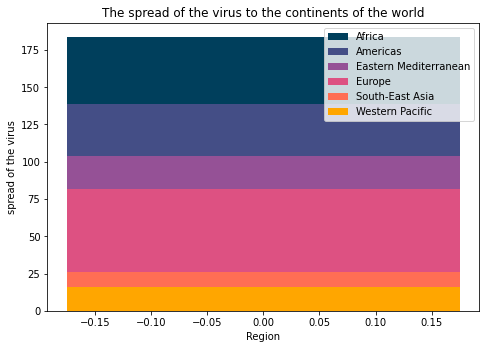

In [ ]:
Africa=(45)
Americas=(35)
Eastern_Mediterranean=(22)
Europe=(56)
South_East_Asia=(10)
Western_Pacific=(16)
X = np.arange(1)
fig = plt.figure()
width = 0.35
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X, Africa, width, bottom=Western_Pacific+South_East_Asia+Europe+Eastern_Mediterranean+Americas, color="#003f5c")
ax.bar(X, Americas, width, bottom=Western_Pacific+South_East_Asia+Europe+Eastern_Mediterranean, color="#444e86")
ax.bar(X, Eastern_Mediterranean, width,bottom=Western_Pacific+South_East_Asia+Europe ,color="#955196")
ax.bar(X, Europe, width, bottom=Western_Pacific+South_East_Asia ,color="#dd5182")
ax.bar(X, South_East_Asia, width, bottom=Western_Pacific, color="#ff6e54")
ax.bar(X, Western_Pacific, width, color="#ffa600")
ax.legend(labels=["Africa", "Americas", "Eastern Mediterranean", "Europe", "South-East Asia", "Western Pacific"])
plt.xlabel("Region")
plt.ylabel("spread of the virus")
plt.title("The spread of the virus to the continents of the world")


**Information on the top ten countries in terms of deaths**

([<matplotlib.axis.XTick at 0x7fc84d36e510>,
 [Text(0, 0, 'Confirmed'),
  Text(0, 0, 'Deaths'),
  Text(0, 0, 'Recovered'),
  Text(0, 0, 'Active')])

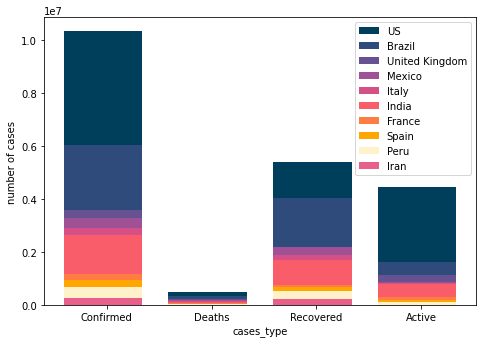

In [ ]:
us = np.array([4290259, 148011, 1325804, 2816444])
brazil = np.array([2442375, 87618, 1846641, 508116])
united_kingdom = np.array([301708, 45844, 1437, 254427])
mexico = np.array([395489, 44022, 303810, 47657])
italy = np.array([246286, 35112, 198593, 12581])
india = np.array([1480073, 33408, 951166, 495499])
france = np.array([220352, 30212, 81212, 108928])
spain	= np.array([272421, 28432, 150376, 93613])
peru = np.array([389717, 18418, 272547, 98752])
iran = np.array([293606, 15912, 255144, 22550])

X = np.arange(4) 
fig = plt.figure()
width = 0.75
ax = fig.add_axes([0,0,1,1])
ax.bar(X, us, width, bottom=iran+peru+spain+france+india+italy+mexico+united_kingdom+brazil, color="#003f5c")
ax.bar(X, brazil, width, bottom=iran+peru+spain+france+india+italy+mexico+united_kingdom, color="#2f4b7c")
ax.bar(X, united_kingdom, width,bottom=iran+peru+spain+france+india+italy+mexico, color="#665191")
ax.bar(X, mexico, width, bottom=iran+peru+spain+france+india+italy, color="#a05195")
ax.bar(X, italy, width,bottom=iran+peru+spain+france+india, color="#d45087")
ax.bar(X, india, width, bottom=iran+peru+spain+france, color="#f95d6a")
ax.bar(X, france, width,bottom=iran+peru+spain, color="#ff7c43")
ax.bar(X, spain, width, bottom=iran+peru, color="#ffa600")
ax.bar(X, peru, width, bottom=iran, color="#FFF1C9")
ax.bar(X, iran, width, color="#EA5F89")
ax.legend(labels=["US", "Brazil", "United Kingdom", "Mexico", "Italy", "India", "France", "Spain", "Peru", "Iran"])
plt.ylabel("number of cases")
plt.xlabel("cases_type")
plt.xticks(X + width / 20, ("Confirmed", "Deaths", "Recovered", "Active"))

**Information on the ten countries with the most new cases**

([<matplotlib.axis.XTick at 0x7fc84d80ddd0>,
 [Text(0, 0, 'Confirmed'),
  Text(0, 0, 'Deaths'),
  Text(0, 0, 'Recovered'),
  Text(0, 0, 'Active')])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


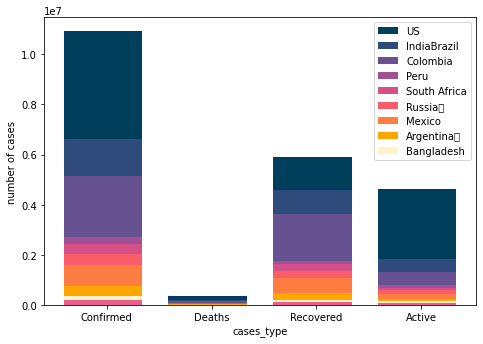

In [ ]:
us = np.array([4290259, 148011, 1325804, 2816444])
india = np.array([1480073, 33408, 951166, 495499])
brazil = np.array([2442375, 87618, 1846641, 508116])
colombia = np.array([257101, 8777, 131161, 117163])	
peru = np.array([389717, 18418, 272547, 98752])
south_africa = np.array([452529, 7067, 274925, 170537])
russia = np.array([816680, 13334, 602249, 201097])
mexico = np.array([395489, 44022, 303810, 47657])
argentina	= np.array([167416, 3059, 72575, 91782])
bangladesh = np.array([226225, 2965, 125683, 97577])
X = np.arange(4) 
fig = plt.figure()
width = 0.75
ax = fig.add_axes([0,0,1,1])

ax.bar(X, us, width, bottom=bangladesh+argentina+mexico+russia+south_africa+peru+colombia+brazil+india, color="#003f5c")
ax.bar(X, india, width, bottom=bangladesh+argentina+mexico+russia+south_africa+peru+colombia+brazil, color="#2f4b7c")
ax.bar(X, brazil, width,bottom=bangladesh+argentina+mexico+russia+south_africa+peru+colombia, color="#665191")
ax.bar(X, colombia, width, bottom=bangladesh+argentina+mexico+russia+south_africa+peru, color="#a05195")
ax.bar(X, peru, width,bottom=bangladesh+argentina+mexico+russia+south_africa, color="#d45087")
ax.bar(X, south_africa, width, bottom=bangladesh+argentina+mexico+russia, color="#f95d6a")
ax.bar(X, russia, width,bottom=bangladesh+argentina+mexico, color="#ff7c43")
ax.bar(X, mexico, width, bottom=bangladesh+argentina, color="#ffa600")
ax.bar(X, argentina, width, bottom=bangladesh, color="#FFF1C9")
ax.bar(X, bangladesh, width, color="#EA5F89")
ax.legend(labels=["US", "India" "Brazil", "Colombia", "Peru", "South Africa", "Russia	", "Mexico", "Argentina	", "Bangladesh"])
plt.ylabel("number of cases")
plt.xlabel("cases_type")
plt.xticks(X + width / 20, ("Confirmed", "Deaths", "Recovered", "Active"))

**The top ten countries in Africa have confirmed cases**

([<matplotlib.axis.XTick at 0x7fc84d10d150>,
 [Text(0, 0, 'Confirmed'),
  Text(0, 0, 'Deaths'),
  Text(0, 0, 'Recovered'),
  Text(0, 0, 'Active')])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


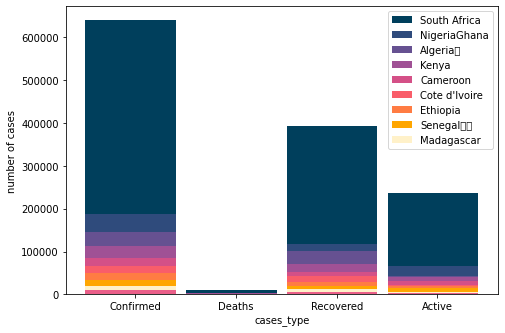

In [ ]:
south_africa =np.array([452529, 7067, 274925, 170537])
nigeria = np.array([41180, 860, 18203	, 22117])
ghana = np.array([33624, 168, 29801, 3655])
algeria = np.array([27973	, 1163, 18837, 7973])
kenya = np.array([17975, 285, 7833, 9857])
cameroon = np.array([17110, 391, 14539, 2180])
cote_divoire= np.array([15655, 96, 10361, 5198])
ethiopia = np.array([14547, 228, 6386, 7933])
senegal = np.array([9764, 194	, 6477, 3093])
madagascar = np.array([9690	, 91, 6260, 3339])
X = np.arange(4) 
fig = plt.figure()
width = 0.90
ax = fig.add_axes([0,0,1,1])
ax.bar(X, south_africa, width, bottom=madagascar+senegal+ethiopia+cote_divoire+cameroon+kenya+algeria+ghana+nigeria, color="#003f5c")
ax.bar(X, nigeria, width, bottom=madagascar+senegal+ethiopia+cote_divoire+cameroon+kenya+algeria+ghana, color="#2f4b7c")
ax.bar(X, ghana, width,bottom=madagascar+senegal+ethiopia+cote_divoire+cameroon+kenya+algeria, color="#665191")
ax.bar(X, algeria, width, bottom=madagascar+senegal+ethiopia+cote_divoire+cameroon+kenya, color="#a05195")
ax.bar(X, kenya, width,bottom=madagascar+senegal+ethiopia+cote_divoire+cameroon, color="#d45087")
ax.bar(X, cameroon, width, bottom=madagascar+senegal+ethiopia+cote_divoire, color="#f95d6a")
ax.bar(X, cote_divoire, width,bottom=madagascar+senegal+ethiopia, color="#ff7c43")
ax.bar(X, ethiopia, width, bottom=madagascar+senegal, color="#ffa600")
ax.bar(X, senegal, width, bottom=madagascar, color="#FFF1C9")
ax.bar(X, madagascar, width, color="#EA5F89")
ax.legend(labels=["South Africa", "Nigeria" "Ghana", "Algeria	", "Kenya", "Cameroon", "Cote d'Ivoire", "Ethiopia", "Senegal		", "Madagascar"])
plt.ylabel("number of cases")
plt.xlabel("cases_type")
plt.xticks(X + width / 20, ("Confirmed", "Deaths", "Recovered", "Active"))

**Europe**


-The top 10 countries in Europe have confirmed cases

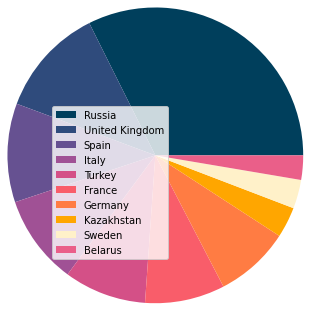

In [ ]:
confirmed =[816680, 301708, 272421, 246286, 227019, 220352, 207112, 84648, 79395, 67251]

plt.pie(confirmed, radius=1.7,startangle=0, colors=["#003f5c","#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600", "#FFF1C9","#EA5F89"], 
        rotatelabels=False)
plt.legend(labels=["Russia", "United Kingdom", "Spain", "Italy", "Turkey", "France", "Germany", "Kazakhstan", "Sweden","Belarus"], loc = 3)

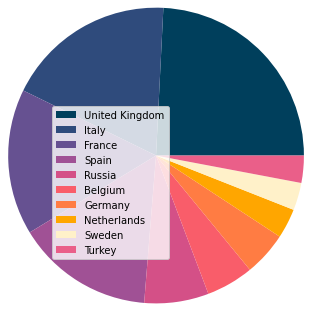

In [ ]:
deaths = [45844, 35112, 30212	, 28432, 13334, 9822, 9125, 6160, 5700, 5630]
plt.pie(deaths, labeldistance=1.1, radius=1.7,
        startangle=0, colors=["#003f5c","#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600", "#FFF1C9","#EA5F89"], 
        rotatelabels=False)
plt.legend(labels=["United Kingdom", "Italy", "France", "Spain", "Russia", "Belgium", "Germany", "Netherlands", "Sweden", "Turkey"], loc = 3)

-The top 10 countries in Europe have deaths cases



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


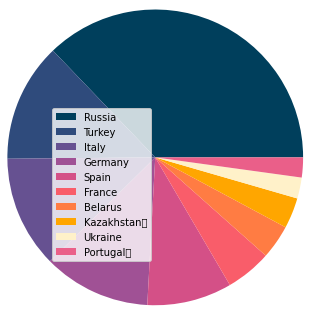

In [ ]:
recovered = [602249, 210469, 198593	, 190314, 150376, 81212, 60492	, 54404, 37202, 35375]
plt.pie(recovered, radius=1.7, startangle=0, colors=["#003f5c","#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600", "#FFF1C9","#EA5F89"], 
        rotatelabels=False)
plt.legend(labels=["Russia", "Turkey", "Italy", "Germany", "Spain", "France", "Belarus", "Kazakhstan	", "Ukraine", "Portugal	"], loc = 3)

-The top 10 countries in Europe have active cases

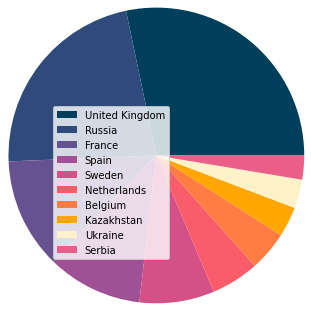

In [ ]:
active = [254427, 201097, 108928, 93613, 73695, 47064, 39154, 29659, 28258, 23598]
plt.pie(active,  radius=1.7,startangle=0, colors=["#003f5c","#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600", "#FFF1C9","#EA5F89"], 
        rotatelabels=False)
plt.legend(labels=["United Kingdom", "Russia", "France", "Spain", "Sweden", "Netherlands", "Belgium", "Kazakhstan", "Ukraine", "Serbia"], loc = 3)

**Western Pacific**

-The top 10 countries in Western Pacific have confirmed cases

Text(0.5, 1.0, 'The top ten countries in Western Pacific have confirmed cases')

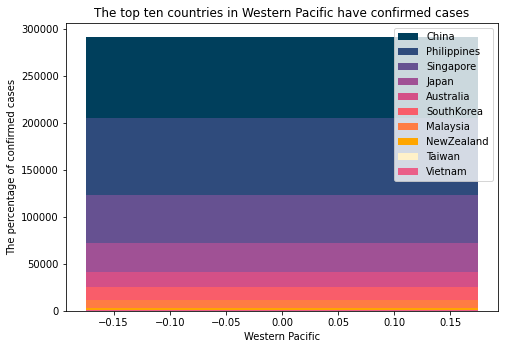

In [ ]:
china=(86783)
philippines=(82040)
singapore=(50838)
japan=(31142)
australia=(15303)
southKorea=(14203)
malaysia =(8904)
newZealand=(1557)
taiwan=(462)
vietnam=(431)
X = np.arange(1)
fig = plt.figure()
width = 0.35
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X, china, width, bottom=vietnam+taiwan+newZealand+malaysia+southKorea+australia+japan+singapore+philippines, color="#003f5c")
ax.bar(X, philippines, width, bottom=vietnam+taiwan+newZealand+malaysia+southKorea+australia+japan+singapore, color="#2f4b7c")
ax.bar(X, singapore, width,bottom=vietnam+taiwan+newZealand+malaysia+southKorea+australia+japan ,color="#665191")
ax.bar(X, japan, width, bottom=vietnam+taiwan+newZealand+malaysia+southKorea+australia ,color="#a05195")
ax.bar(X, australia, width, bottom=vietnam+taiwan+newZealand+malaysia+southKorea, color="#d45087")
ax.bar(X, southKorea, width,bottom=vietnam+taiwan+newZealand+malaysia, color="#f95d6a")
ax.bar(X, malaysia , width,bottom=vietnam+taiwan+newZealand, color="#ff7c43")
ax.bar(X, newZealand, width,bottom=vietnam+taiwan, color="#ffa600")
ax.bar(X, taiwan, width,bottom=vietnam, color="#FFF1C9")
ax.bar(X, vietnam, width, color="#EA5F89")

ax.legend(labels=["China", "Philippines", "Singapore", "Japan", "Australia", "SouthKorea", "Malaysia", "NewZealand", "Taiwan", "Vietnam"])
plt.xlabel("Western Pacific")
plt.ylabel("Number of confirmed cases")
plt.title("The top ten countries in Western Pacific have confirmed cases")

-The top 10 countries in Western Pacific have deaths cases

Text(0.5, 1.0, 'The top ten countries in Western Pacific have deaths cases')

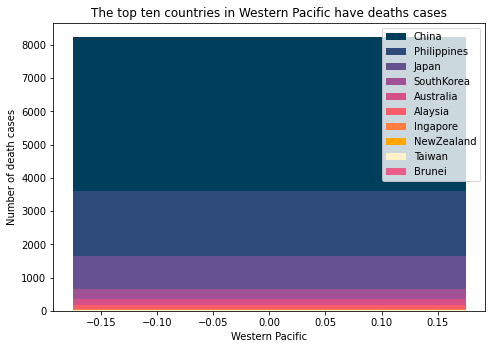

In [ ]:
china=(4656)
philippines=(1945)
japan=(998)
southKorea=(300)
australia=(167)
alaysia=(124)
ingapore =(27)
newZealand=(22)
taiwan=(7)
brunei=(3)
X = np.arange(1)
fig = plt.figure()
width = 0.35
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X, china, width,bottom=brunei+taiwan+newZealand+ingapore+alaysia+australia+southKorea+japan+philippines, color="#003f5c")
ax.bar(X, philippines, width,bottom=brunei+taiwan+newZealand+ingapore+alaysia+australia+southKorea+japan , color="#2f4b7c")
ax.bar(X, japan, width,bottom=brunei+taiwan+newZealand+ingapore+alaysia+australia+southKorea ,color="#665191")
ax.bar(X, southKorea, width, bottom=brunei+taiwan+newZealand+ingapore+alaysia+australia ,color="#a05195")
ax.bar(X, australia, width, bottom=brunei+taiwan+newZealand+ingapore+alaysia, color="#d45087")
ax.bar(X, alaysia, width,bottom=brunei+taiwan+newZealand+ingapore, color="#f95d6a")
ax.bar(X, ingapore , width,bottom=brunei+taiwan+newZealand, color="#ff7c43")
ax.bar(X, newZealand, width,bottom=brunei+taiwan, color="#ffa600")
ax.bar(X, taiwan, width,bottom=brunei, color="#FFF1C9")
ax.bar(X, brunei, width, color="#EA5F89")

ax.legend(labels=["China", "Philippines", "Japan", "SouthKorea", "Australia", "Alaysia", "Ingapore", "NewZealand", "Taiwan", "Brunei"])
plt.xlabel("Western Pacific")
plt.ylabel("Number of death cases")
plt.title("The top ten countries in Western Pacific have deaths cases")


**South-East Asia**

-The top 10 countries in South-East Asia have confirmed cases

Text(0.5, 1.0, '10 countries in South-East Asia have most confirmed')

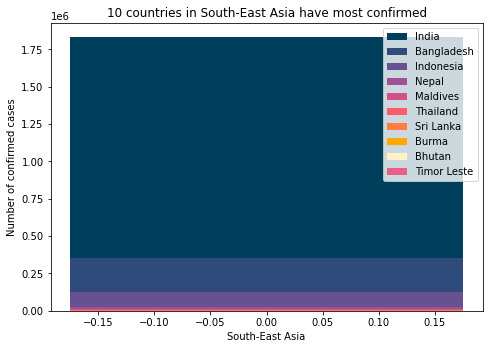

In [ ]:
india=(1480073)
bangladesh=(226225)
indonesia=(100303)
nepal=(18752)
maldives=(3369)
thailand=(3297)
sri_lanka =(2805)
Burma=(350)
bhutan=(99)
timor_leste=(24)
X = np.arange(1)
fig = plt.figure()
width = 0.35
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X, india, width, bottom=timor_leste+bhutan+Burma+sri_lanka+thailand+maldives+nepal+indonesia+bangladesh, color="#003f5c")
ax.bar(X, bangladesh, width,bottom=timor_leste+bhutan+Burma+sri_lanka+thailand+maldives+nepal+indonesia, color="#2f4b7c")
ax.bar(X, indonesia, width,bottom=timor_leste+bhutan+Burma+sri_lanka+thailand+maldives+nepal ,color="#665191")
ax.bar(X, nepal, width, bottom=timor_leste+bhutan+Burma+sri_lanka+thailand+maldives ,color="#a05195")
ax.bar(X, maldives, width, bottom=timor_leste+bhutan+Burma+sri_lanka+thailand, color="#d45087")
ax.bar(X, thailand, width,bottom=timor_leste+bhutan+Burma+sri_lanka, color="#f95d6a")
ax.bar(X, sri_lanka , width,bottom=timor_leste+bhutan+Burma, color="#ff7c43")
ax.bar(X, Burma, width,bottom=timor_leste+bhutan, color="#ffa600")
ax.bar(X, bhutan, width,bottom=timor_leste, color="#FFF1C9")
ax.bar(X, timor_leste, width, color="#EA5F89")

ax.legend(labels=["India", "Bangladesh", "Indonesia", "Nepal", "Maldives", "Thailand", "Sri Lanka", "Burma", "Bhutan", "Timor Leste"])
plt.xlabel("South-East Asia")
plt.ylabel("Number of confirmed cases")
plt.title("10 countries in South-East Asia have most confirmed")


-The top 10 countries in South-East Asia have deaths cases

Text(0.5, 1.0, 'The top 10 countries in South-East Asia have deaths cases')

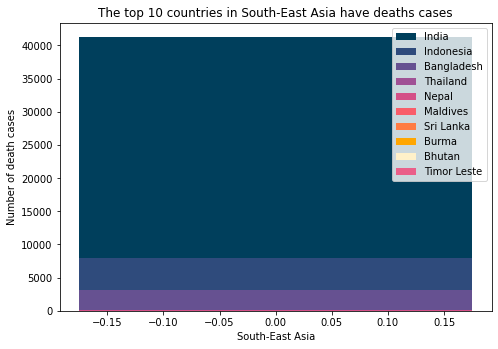

In [ ]:
india=(33408)
indonesia=(4838)
bangladesh=(2965)
thailand=(58)
nepal=(48)
maldives=(15)
sri_lanka =(11)
burma=(6)
bhutan=(0)
timor_leste=(0)
X = np.arange(1)
fig = plt.figure()
width = 0.35
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(X, india, width, bottom=timor_leste+bhutan+burma+sri_lanka+maldives+nepal+thailand+bangladesh+indonesia, color="#003f5c")
ax.bar(X, indonesia, width,bottom=timor_leste+bhutan+burma+sri_lanka+maldives+nepal+thailand+bangladesh , color="#2f4b7c")
ax.bar(X, bangladesh, width,bottom=timor_leste+bhutan+burma+sri_lanka+maldives+nepal+thailand ,color="#665191")
ax.bar(X, thailand, width, bottom=timor_leste+bhutan+burma+sri_lanka+maldives+nepal ,color="#a05195")
ax.bar(X, nepal, width, bottom=timor_leste+bhutan+burma+sri_lanka+maldives, color="#d45087")
ax.bar(X, maldives, width,bottom=timor_leste+bhutan+burma+sri_lanka, color="#f95d6a")
ax.bar(X, sri_lanka , width,bottom=timor_leste+bhutan+burma, color="#ff7c43")
ax.bar(X, burma, width,bottom=timor_leste+bhutan, color="#ffa600")
ax.bar(X, bhutan, width,bottom=timor_leste, color="#FFF1C9")
ax.bar(X, timor_leste, width, color="#EA5F89")

ax.legend(labels=["India", "Indonesia", "Bangladesh", "Thailand", "Nepal", "Maldives", "Sri Lanka", "Burma", "Bhutan", "Timor Leste"])
plt.xlabel("South-East Asia")
plt.ylabel("Number of death cases")
plt.title("The top 10 countries in South-East Asia have deaths cases")

**Americas**

-The top 10 countries in Americas have confirmed cases

Text(0.5, 1.0, 'The top 10 countries in Americas have confirmed cases')

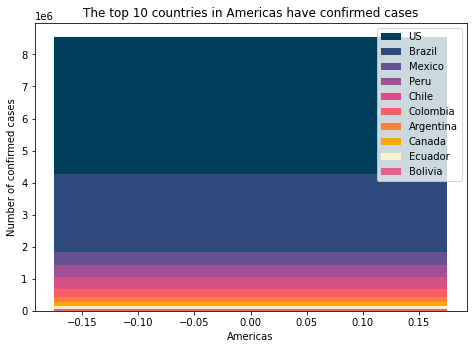

In [ ]:
us=(4290259)
brazil=(2442375)
mexico=(395489)
peru=(389717)
chile=(347923)
colombia=(257101)
argentina =(167416)
canada=(116458)
ecuador=(81161)
bolivia=(71181)
X = np.arange(1)
fig = plt.figure()
width = 0.35
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X, us, width, bottom=bolivia+ecuador+canada+argentina+colombia+chile+peru+mexico+brazil, color="#003f5c")
ax.bar(X, brazil, width,bottom=bolivia+ecuador+canada+argentina+colombia+chile+peru+mexico, color="#2f4b7c")
ax.bar(X, mexico, width, bottom=bolivia+ecuador+canada+argentina+colombia+chile+peru ,color="#665191")
ax.bar(X, peru, width, bottom=bolivia+ecuador+canada+argentina+colombia+chile ,color="#a05195")
ax.bar(X, chile, width, bottom=bolivia+ecuador+canada+argentina+colombia, color="#d45087")
ax.bar(X, colombia, width,bottom=bolivia+ecuador+canada+argentina, color="#f95d6a")
ax.bar(X, argentina , width,bottom=bolivia+ecuador+canada, color="#ff7c43")
ax.bar(X, canada, width,bottom=bolivia+ecuador, color="#ffa600")
ax.bar(X, ecuador, width,bottom=bolivia, color="#FFF1C9")
ax.bar(X, bolivia, width, color="#EA5F89")

ax.legend(labels=["US", "Brazil", "Mexico", "Peru", "Chile", "Colombia", "Argentina", "Canada", "Ecuador", "Bolivia"])
plt.xlabel("Americas")
plt.ylabel("Number of confirmed cases")
plt.title("The top 10 countries in Americas have confirmed cases")

-The top 10 countries in Americas have deaths cases

Text(0.5, 1.0, 'The top 10 countries in Americas have deaths cases')

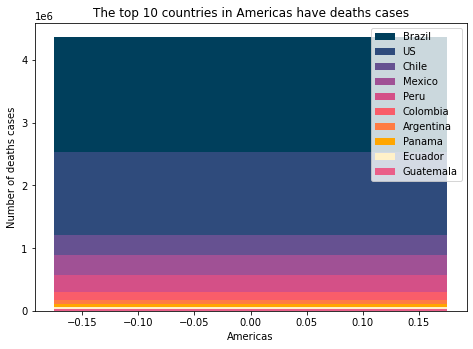

In [ ]:
brazil=(1846641)
us=(1325804)
chile=(319954)
mexico=(303810)
peru=(272547)
colombia=(131161)
argentina =(72575)
panama=(35086)
ecuador=(34896	)
guatemala=(32455)
X = np.arange(1)
fig = plt.figure()
width = 0.35
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X, brazil, width, bottom=guatemala+ecuador+panama+argentina+colombia+peru+mexico+chile+us, color="#003f5c")
ax.bar(X, us, width,bottom=guatemala+ecuador+panama+argentina+colombia+peru+mexico+chile, color="#2f4b7c")
ax.bar(X, chile, width, bottom=guatemala+ecuador+panama+argentina+colombia+peru+mexico ,color="#665191")
ax.bar(X, mexico, width, bottom=guatemala+ecuador+panama+argentina+colombia+peru ,color="#a05195")
ax.bar(X, peru, width, bottom=guatemala+ecuador+panama+argentina+colombia, color="#d45087")
ax.bar(X, colombia, width,bottom=guatemala+ecuador+panama+argentina, color="#f95d6a")
ax.bar(X, argentina , width,bottom=guatemala+ecuador+panama, color="#ff7c43")
ax.bar(X, panama, width,bottom=guatemala+ecuador, color="#ffa600")
ax.bar(X, ecuador, width,bottom=guatemala, color="#FFF1C9")
ax.bar(X, guatemala, width, color="#EA5F89")

ax.legend(labels=["Brazil", "US", "Chile", "Mexico", "Peru", "Colombia", "Argentina", "Panama", "Ecuador", "Guatemala"])
plt.xlabel("Americas")
plt.ylabel("Number of deaths cases")
plt.title("The top 10 countries in Americas have deaths cases")

**Eastern Mediterranean**

-The top 10 countries in Eastern Mediterranean have confirmed cases

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


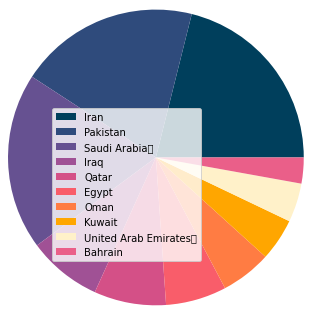

In [ ]:
confirmed =[293606, 274289, 268934, 112585, 109597, 92482, 77058, 64379, 59177, 39482]

plt.pie(confirmed, radius=1.7,startangle=0, colors=["#003f5c","#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600", "#FFF1C9","#EA5F89"], 
        rotatelabels=False)
plt.legend(labels=["Iran", "Pakistan", "Saudi Arabia	", "Iraq", "Qatar", "Egypt", "Oman", "Kuwait", "United Arab Emirates	","Bahrain"], loc = 3)

-The top 10 countries in Eastern Mediterranean have recovered cases

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


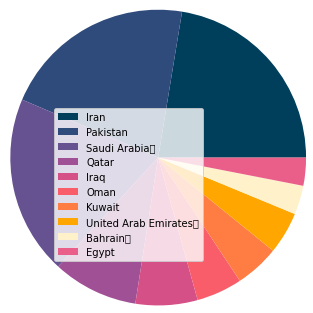

In [ ]:
confirmed =[255144, 241026, 222936, 106328, 77144, 57028, 55057, 52510, 36110, 34838]

plt.pie(confirmed, radius=1.7,startangle=0, colors=["#003f5c","#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600", "#FFF1C9","#EA5F89"], 
        rotatelabels=False)
plt.legend(labels=["Iran", "Pakistan", "Saudi Arabia	", "Qatar", "Iraq", "Oman", "Kuwait", "United Arab Emirates	", "Bahrain	","Egypt"], loc = 3)